# Sprint 9  Ejercicios de análisis de sentimientos y textos.


###  Ejercicio 1

**Selecciona un texto en inglés y calcula la frecuencia de las palabras.**


###  Ejercicio 2

**Extrae las stopwords y realiza stemming a tu conjunto de datos.** 


### Ejercicio 3

**Realiza sentiment analysis a tu conjunto de datos.**

El **análisis de texto** se refiere al proceso de analizar y extraer información significativa de datos de texto no estructurados. Uno de los subcampos más importantes del análisis de texto es el **análisis de sentimientos**, que implica determinar el tono emocional del texto.

Natural Language Toolkit (NLTK) es una librería para el procesamiento del lenguaje natural (NLP) en Python. Inlcuye Permite llevar a cabo tareas como:

* **tokenización**: dividir un texto en unidades más pequeñas llamadas "tokens" como palabra, frase o párrafo.
* la **derivación o stemming**: reducir las palabras a su forma raíz o base, eliminando afijos y sufijos.
* la **lematización o lemmatization**: reducir una palabra a su forma base o lema, con el objetivo de capturar su forma básica (lema es la forma de una palabra que se encuentra en un diccionario).
* el **análisis sintáctico o parsing**:  analizar una cadena de texto para comprender su estructura gramatical y su significado. Descomponer una entrada de texto en sus componentes más pequeños y entender cómo están organizados y relacionados entre sí.
* el **análisis de sentimiento**: se utiliza para determinar la actitud o el tono emocional detrás de un texto, ya sea positivo, negativo o neutral. Permite comprender las opiniones, emociones y actitudes expresadas en un texto. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# Importaremos  NLTK  que es un kit de herramientas de lenguaje natural

import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gemma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Para llevar a cabo este ejercicio voy a usar el primer capítulo del libro Harry Potter y la Piedra Filosofal en inglés. Título original: "Harry Potter and the Philosopher's Stone" en el Reino Unido es el primer libro de la popular serie de novelas de fantasía escrita por la autora británica J.K. Rowling. La novela fue publicada por primera vez en 1997 y se ha publicado en más de 80 idiomas.

La novela se adaptó a una exitosa serie de películas, con Daniel Radcliffe interpretando a Harry Potter. La primera película se estrenó en 2001.

In [2]:
ruta_del_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 9 T1\\Hp_chapter_1.txt"

# Lee el contenido del archivo de texto en una cadena
with open(ruta_del_archivo, 'r', encoding='utf-8') as archivo:
    capitulo = archivo.read()

# Pasamos todas las palabras a minúsculas para que las pueda agrupar sin problemas.
capitulo = capitulo.lower()
capitulo

'mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursley’s sister, but they hadn’t met for several year

In [3]:
tokens = nltk.word_tokenize(capitulo)
print(tokens)

['mr.', 'and', 'mrs.', 'dursley', ',', 'of', 'number', 'four', ',', 'privet', 'drive', ',', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', ',', 'thank', 'you', 'very', 'much', '.', 'they', 'were', 'the', 'last', 'people', 'you', '’', 'd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', ',', 'because', 'they', 'just', 'didn', '’', 't', 'hold', 'with', 'such', 'nonsense', '.', 'mr.', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', ',', 'which', 'made', 'drills', '.', 'he', 'was', 'a', 'big', ',', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', ',', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', '.', 'mrs.', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', ',', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', ',', 'spying

Una vez tokenizado el texto podemos observar que los signos de puntuación los considera tokens. Para evitar eso, haremos una limpieza.

In [4]:
tokens_cleaned = [word for word in tokens if word.isalpha()] # Sirve para seleccionar palabras, elimina otros signos
print(tokens_cleaned)

['and', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'they', 'were', 'the', 'last', 'people', 'you', 'd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didn', 't', 'hold', 'with', 'such', 'nonsense', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', 'which', 'made', 'drills', 'he', 'was', 'a', 'big', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', 'spying', 'on', 'the', 'neighbors', 'the', 'dursleys', 'had', 'a', 'small', 'son', 'called', 'dudley', 'and', 'in', '

In [5]:
total_tokens_cleaned = len(tokens_cleaned)

print(f"Total de tokens limpios: {total_tokens_cleaned}")

Total de tokens limpios: 4621


Para saber cuantas palabras se repiten usaremos FreqDist. Para calcular y representar la distribución de frecuencias de palabras en un texto. Esta función toma una lista de palabras como entrada y genera un objeto de distribución de frecuencias que muestra cuántas veces aparece cada palabra en el texto.

In [6]:
from nltk import FreqDist

freq_dist = FreqDist(tokens_cleaned)

df_tokens = pd.DataFrame([(word, freq) for word, freq in freq_dist.items()], columns=['Palabra', 'Frecuencia'])
df_tokens['Frecuencia Relativa'] = round(df_tokens['Frecuencia'] / total_tokens_cleaned,2)

df_tokens = df_tokens.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)
df_tokens

,Palabra,Frecuencia,Frecuencia Relativa
0,the,203,0.04
1,he,156,0.03
2,a,112,0.02
3,and,102,0.02
4,to,94,0.02
...,...,...,...
1106,throat,1,0.00
1107,nervously,1,0.00
1108,er,1,0.00
1109,your,1,0.00


In [7]:
freq_dist.tabulate(15)

    the      he       a     and      to     was      it      of     his       t    that      in      on      as dursley 
    203     156     112     102      94      89      84      73      69      63      59      57      51      47      46 


Observamos que la letra t está considerada como un token x si solo. Esta letra es parte de palabras como don't, didn't, ... . En realidad por si sola no es una palabra. Aunque si que es verdad que añade la negación al significado. Al no tener muy claro como actuar con ella. Procedemos a eleminarla del dataframe de tokens. Finalmente hemos visto que estas letras las tiene contempladas stopwords, así que las dejamos.

In [8]:
#df_tokens = df_tokens[(df_tokens['Palabra'] != 't') & (df_tokens['Palabra'] != 's')]
#df_tokens.shape

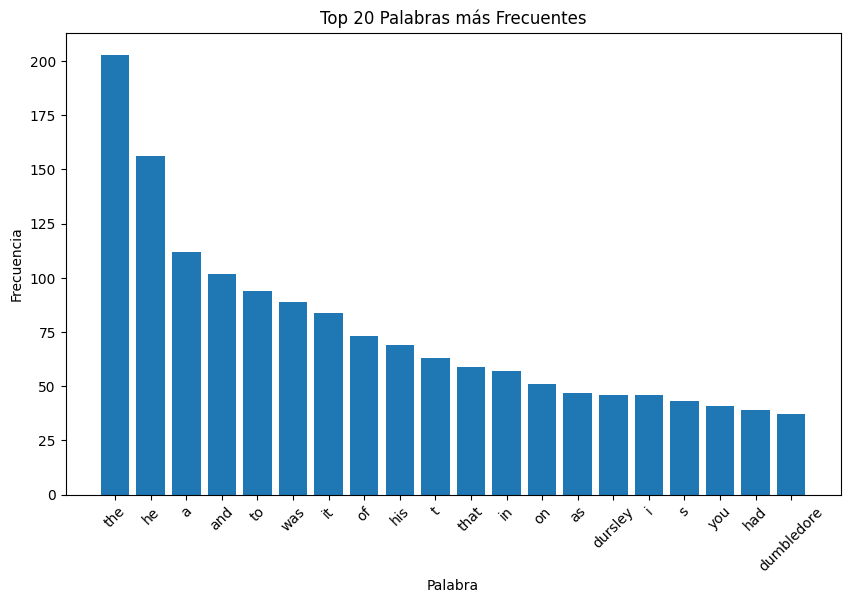

In [9]:
top_20_words = df_tokens.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_words["Palabra"], top_20_words["Frecuencia"])
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.title("Top 20 Palabras más Frecuentes")
plt.show()

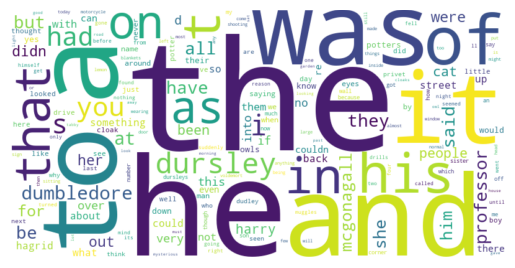

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(freq_dist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Hemos podido observar que todo el capítulo 1 de Harry Potter se puede dividir en 1109tokens. Los más repetidos son palabras unión como el artículo "the" o "and". Curiosamente, en este primer capítulo no sale demasiado el nombre de Harry ni su apellido. Sale mucho más el apellido de sus tíos "Dursley". 

### Ejercicio 2

**Extrae las stopwords y realiza stemming a tu conjunto de datos.**

Las **"stopwords"** son palabras que se eliminan de un texto durante el procesamiento del lenguaje natural debido a que son consideradas palabras muy comunes y generalmente carecen de significado específico en un contexto dado. Estas palabras son eliminadas para reducir el ruido y mejorar el procesamiento de texto en tareas de análisis de lenguaje natural.

In [11]:
# Descargamos la lista de stopwords
nltk.download('stopwords')  

stop_words = set(stopwords.words('english')) 
sorted_stop_words = sorted(list(stop_words))

print(sorted_stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gemma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Filtramos la lista de tokens del texto sin las stopwords

tokens_cleaned = [word for word in tokens_cleaned if word.lower() not in stop_words]
tokens_cleaned.sort()
print (tokens_cleaned)

['able', 'able', 'across', 'across', 'act', 'acting', 'admiring', 'affect', 'afternoon', 'age', 'air', 'air', 'air', 'albus', 'albus', 'albus', 'allowed', 'allowed', 'almost', 'almost', 'almost', 'almost', 'almost', 'also', 'also', 'although', 'although', 'always', 'always', 'amount', 'amuse', 'angrily', 'angrily', 'angry', 'another', 'another', 'another', 'answer', 'anxious', 'anyone', 'anyone', 'anything', 'anything', 'anything', 'anything', 'anything', 'anywhere', 'apart', 'appeared', 'appeared', 'approve', 'arm', 'armchair', 'arms', 'arms', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'arrived', 'arrived', 'arrived', 'ask', 'asked', 'asked', 'asleep', 'asleep', 'asleep', 'asleep', 'astonishing', 'astounding', 'astride', 'aunt', 'aunt', 'awake', 'away', 'away', 'away', 'away', 'baby', 'baby', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'backed', 'bag', 'baker', 

In [16]:
len(tokens_cleaned)

2202

El **"stemming"** es un proceso de reducción de palabras a su forma base o raíz, lo que implica eliminar sufijos y prefijos para obtener la parte fundamental o raíz de una palabra. El objetivo del stemming es simplificar las palabras para que palabras similares tengan una representación común.

In [18]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Aplicamos stemming a cada palabra
tokens_cleaned = [stemmer.stem(token) for token in tokens_cleaned]

tokens_cleaned.sort()

print(tokens_cleaned)


['abl', 'abl', 'across', 'across', 'act', 'act', 'admir', 'affect', 'afternoon', 'age', 'air', 'air', 'air', 'albu', 'albu', 'albu', 'allow', 'allow', 'almost', 'almost', 'almost', 'almost', 'almost', 'also', 'also', 'although', 'although', 'alway', 'alway', 'amount', 'amus', 'angri', 'angrili', 'angrili', 'anoth', 'anoth', 'anoth', 'answer', 'anxiou', 'anyon', 'anyon', 'anyth', 'anyth', 'anyth', 'anyth', 'anyth', 'anywher', 'apart', 'appear', 'appear', 'approv', 'arm', 'arm', 'arm', 'armchair', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'around', 'arriv', 'arriv', 'arriv', 'ask', 'ask', 'ask', 'asleep', 'asleep', 'asleep', 'asleep', 'astonish', 'astound', 'astrid', 'aunt', 'aunt', 'awak', 'away', 'away', 'away', 'away', 'babi', 'babi', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'back', 'bag', 'baker', 'bakeri', 'ball', 'bathroom', 'bear', 'bear', 'bear', 'beard', 'beard'

In [17]:
len(tokens_cleaned)

2202

Podemos observar que después de sacar las stopwords quedaron 2202 tokens, y una vez aplicado el stemmed quedaron la misma cantidad de tokens. Ya que lo que hace es dejar el token pero reducirlo a su raiz. De manera que cuando se calcule su frecuencia se agrupen. 

En vez del stemming se podría haber usado el método de **lematización**. Proceso en el procesamiento de lenguaje natural (NLP) que se utiliza para reducir las palabras a su forma base o raíz, llamada "lema," de manera que se conserve el significado de la palabra. A diferencia del stemming, que elimina sufijos y prefijos de las palabras para obtener una forma base, la lematización considera la estructura morfológica de las palabras y las reduce a una forma que sea un lema válido en el idioma.

In [19]:
# Ejemplo de cómo se calcularía la lematización
#import nltk
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#lemmatizer = WordNetLemmatizer()
#tokens_lemmatize = [lemmatizer.lemmatize(token) for token in palabras_filtradas]
#tokens_lemmatize.sort()
#print(tokens_lemmatize)

In [20]:
total_tokens_cleaned1 = len(tokens_cleaned)

print(f"Total de tokens limpios: {total_tokens_cleaned1}")

Total de tokens limpios: 2202


In [21]:
freq_dist = FreqDist(tokens_cleaned)

df_tokens_clean = pd.DataFrame([(word, freq) for word, freq in freq_dist.items()], columns=['Palabra', 'Frecuencia'])
df_tokens_clean['Frecuencia Relativa'] = round(df_tokens['Frecuencia'] / total_tokens_cleaned1,2)

df_tokens_clean = df_tokens_clean.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)
df_tokens_clean

,Palabra,Frecuencia,Frecuencia Relativa
0,dursley,53,0.0
1,dumbledor,37,0.0
2,said,32,0.0
3,professor,30,0.0
4,mcgonagal,25,0.0
...,...,...,...
858,dull,1,0.0
859,dunde,1,0.0
860,oddli,1,0.0
861,odd,1,0.0


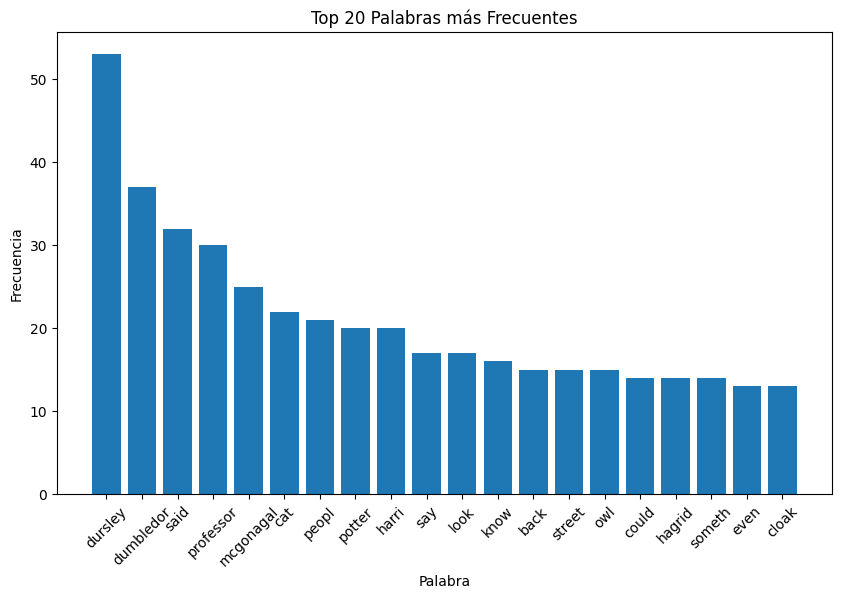

In [22]:
top_20_words = df_tokens_clean.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_words["Palabra"], top_20_words["Frecuencia"])
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.title("Top 20 Palabras más Frecuentes")
plt.show()

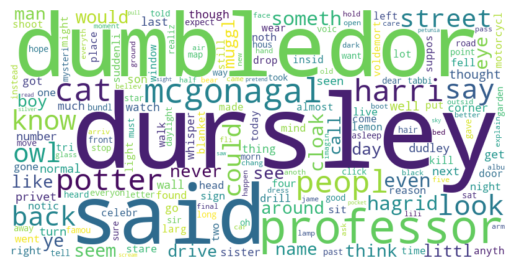

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(freq_dist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
# Creamos una función para ver cuantas veces se repite una palabra en este capítulo.

def encontrar_indice_palabra(dataframe, palabra_a_buscar):
    indice = dataframe.loc[dataframe['Palabra'] == palabra_a_buscar].index
    if not indice.empty:
        indice = indice[0]  
        frecuencia = dataframe.loc[indice, 'Frecuencia']
        print(f'La palabra "{palabra_a_buscar}" se encuentra en el índice {indice} con una frecuencia de {frecuencia}.')
    else:
        print(f'La palabra "{palabra_a_buscar}" no se encuentra en el DataFrame.')

# Búsqueda de "potter"
encontrar_indice_palabra(df_tokens_clean, "potter")
encontrar_indice_palabra(df_tokens_clean, "harri")
encontrar_indice_palabra(df_tokens_clean, "dursley")

La palabra "potter" se encuentra en el índice 7 con una frecuencia de 20.
La palabra "harri" se encuentra en el índice 8 con una frecuencia de 20.
La palabra "dursley" se encuentra en el índice 0 con una frecuencia de 53.


De 4621 tokens iniciales, tras la limpieza de stopwords y el stemming nos hemos quedado con 2201 tokens, que a su vez se han visto reducidos a 863. Como comenté antes de la limpieza, curiosamente en este primer capítulo de las palabras como "harri" o "potter" no se le mencionan tanto como es esperado, sólo 20 veces cada una. En cambio el apellido de sus tíos "dursley"que son personajes totalmente secundarios aparecen 53 veces. 

### Ejercicio 3

**Realiza sentiment analysis a tu conjunto de datos.**

El **análisis de sentimiento** es una técnica de procesamiento de lenguaje natural que se utiliza para determinar la actitud, emoción o sentimiento expresado en un texto o discurso. El objetivo principal del análisis de sentimiento es identificar si el texto analizado es positivo, negativo o neutral.

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(capitulo)
df_scores = pd.DataFrame(scores, index=[0])
df_scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gemma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,neg,neu,pos,compound
0,0.07,0.836,0.094,0.999


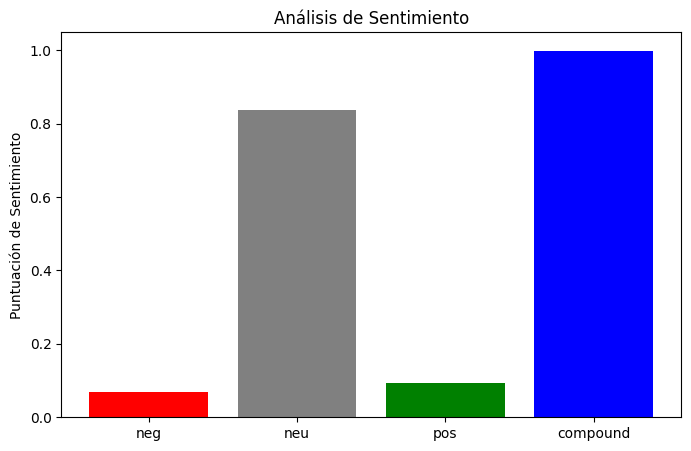

In [36]:

categorias = ['neg', 'neu', 'pos', 'compound']

puntuaciones = df_scores.values[0] 

plt.figure(figsize=(8, 5))
plt.bar(categorias, puntuaciones, color=['red', 'gray', 'green', 'blue'])
plt.title('Análisis de Sentimiento')
plt.ylabel('Puntuación de Sentimiento')


plt.show()

Como podemos observar, la mayoría del texto se podría considerar neutral. Aunque tenemos un ligero valor de texto considerado negativo (0,07), y una otra parte pequeña considerada positiva (0,094). De manera que si sólo tuvieramos esos valores se consideraría un texto neutral con una cierta tendencia al sentimiento positivo. 

Pero existe una última medida llamada **compound**, un análisis de sentimiento que indica si un texto es positivo, negativo o neutral. También refleja la intensidad de ese sentimiento, donde valores cercanos a 1 representan un sentimiento fuerte, valores cercanos a 0 indican un sentimiento débil o neutral y los valores cercanos a -1 reprensentan un sentimiento negativo.

En este caso el compound obtenido es 0,999 casi 1 de manera que podemos afirmar que el análisis global considera el texto como extremadamente positivo. Esta puntuación compuesta es una combinación de las puntuaciones de negativo, neutral y positivo, y tiende a variar entre -1 y 1. Cuanto más cercano a 1 esté este valor, más positivo se considera el texto en su conjunto.

En resumen, los valores indican que el texto tiene una tendencia muy positiva, con una pequeña cantidad de negatividad y positividad. El análisis de sentimiento clasifica el texto como mayormente neutro, pero con una fuerte inclinación positiva. 